<a href="https://colab.research.google.com/github/uginm102/MCSC-MUK/blob/main/MCS7227%20Data%20Analytics%20and%20Visualization/MCS_7227_Data_Analytics_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Prediction with Global Factors
We shall be using medical data (e.g., age, BMI) and joining it with nationality and GDP to predict heart disease risk across different countries.

##Import relevant assemblies

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load Data

In [3]:
# File path to the cleaned dataset
input_file = "/content/drive/MyDrive/Personal/Masters/Msc Comp Sc - MUK/Year 1/Sem 2/MCS7227 Data Analytics and Visualization/heart_attack_prediction_dataset.csv"

# Load the cleaned dataset
df = pd.read_csv(input_file)

df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## Exploratory analysis

In [5]:
rows, columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")
print(df.keys())
df.info()

Number of rows: 8763, Number of columns: 26
Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 

We have 8,763 rows to deal with each with 26 properties.

Dataset Glossary (Column-wise)
1. Patient ID - Unique identifier for each patient
2. Age - Age of the patient
3. Sex - Gender of the patient (Male/Female)
4. Cholesterol - Cholesterol levels of the patient
5. Blood Pressure - Blood pressure of the patient (systolic/diastolic)
6. Heart Rate - Heart rate of the patient
7. Diabetes - Whether the patient has diabetes (Yes/No)
8. Family History - Family history of heart-related problems (1: Yes, 0: No)
9. Smoking - Smoking status of the patient (1: Smoker, 0: Non-smoker)
10. Obesity - Obesity status of the patient (1: Obese, 0: Not obese)
11. Alcohol Consumption - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)
12. Exercise Hours Per Week - Number of exercise hours per week
13. Diet - Dietary habits of the patient (Healthy/Average/Unhealthy)
14. Previous Heart Problems - Previous heart problems of the patient (1: Yes, 0: No)
15. Medication Use - Medication usage by the patient (1: Yes, 0: No)
16. Stress Level - Stress level reported by the patient (1-10)
17. Sedentary Hours Per Day - Hours of sedentary activity per day
18. Income - Income level of the patient
19. BMI - Body Mass Index (BMI) of the patient
20. Triglycerides - Triglyceride levels of the patient
21. Physical Activity Days Per Week - Days of physical activity per week
22. Sleep Hours Per Day - Hours of sleep per day
23. Country - Country of the patient
24. Continent - Continent where the patient resides
25. Hemisphere - Hemisphere where the patient resides
26. Heart Attack Risk - Presence of heart attack risk (1: Yes, 0: No)

###Age Distribution

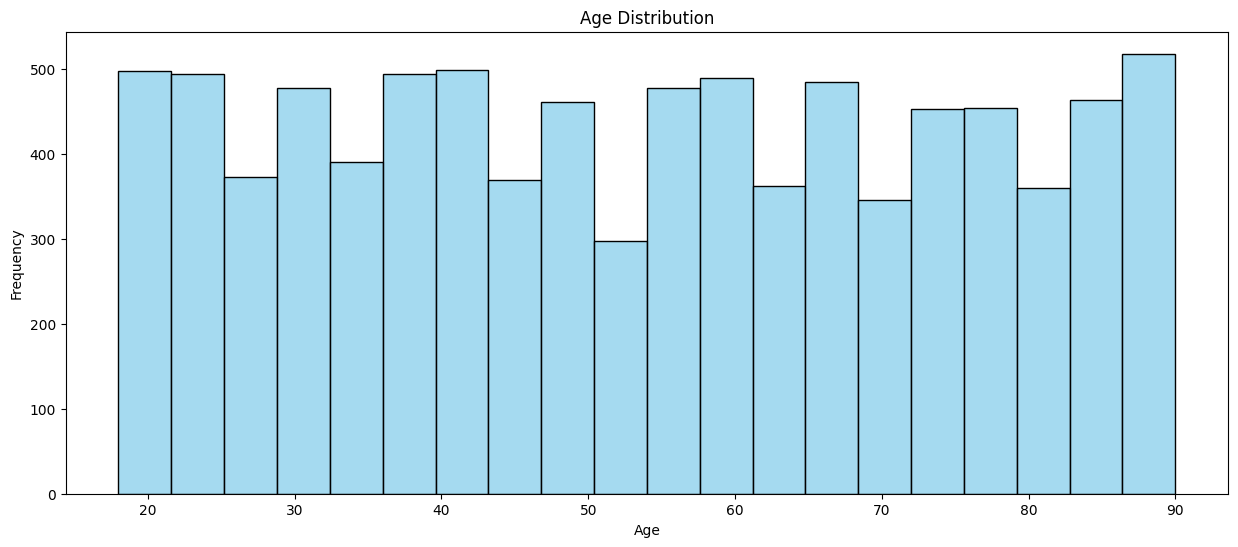

In [9]:
plt.figure(figsize=(15, 6))
sns.histplot(df['Age'], kde=False, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

###Income Distribution

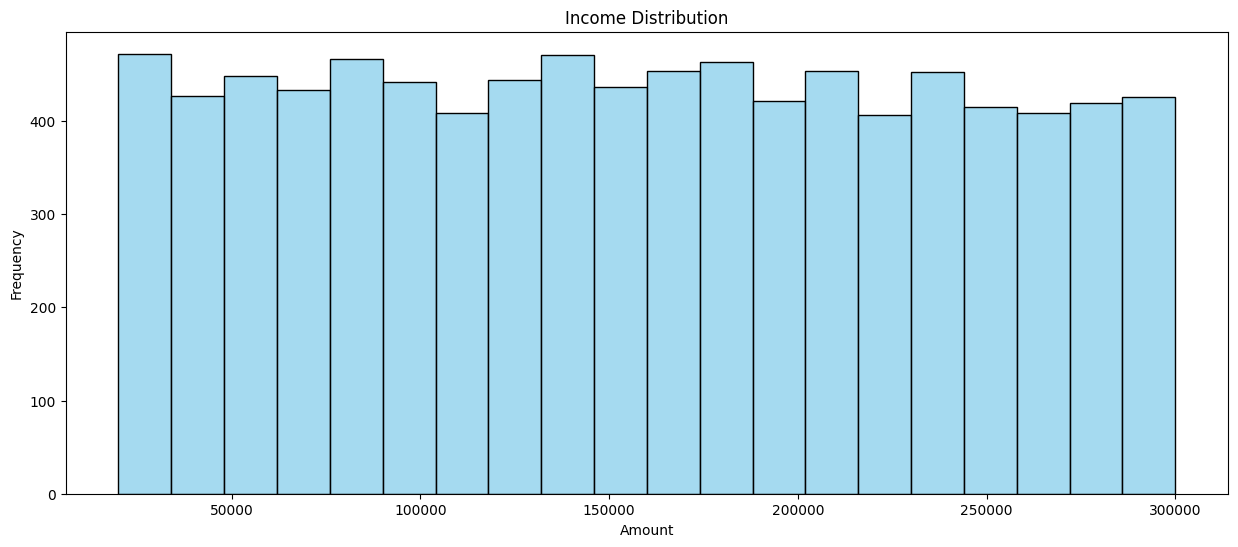

In [29]:
plt.figure(figsize=(15, 6))
sns.histplot(df['Income'], kde=False, bins=20, color='skyblue')
plt.title('Income Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

###Heart Attack Risk by Gender

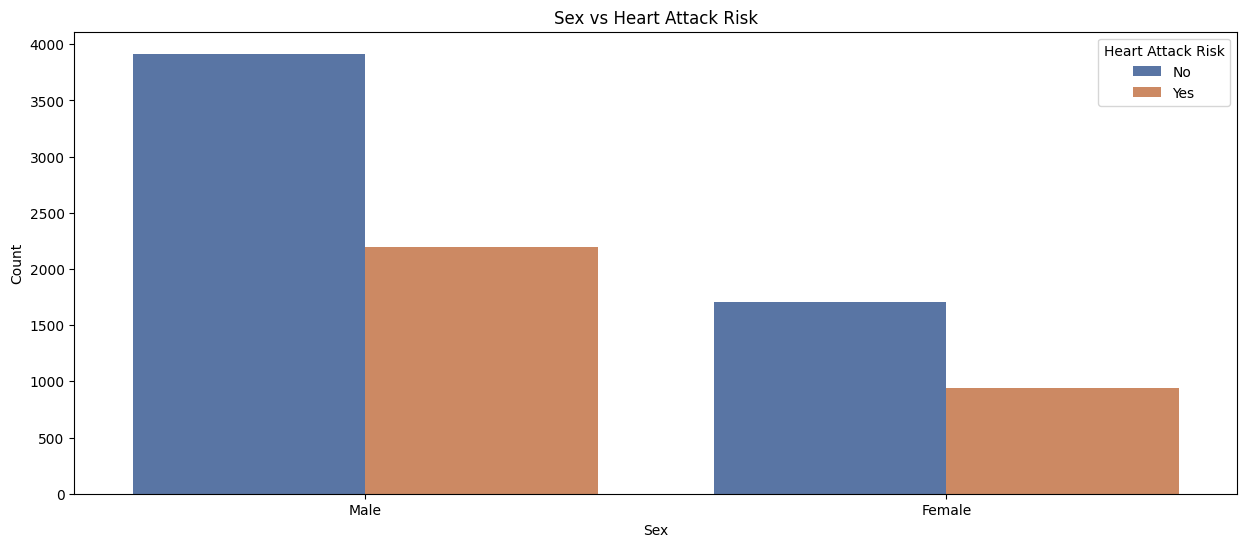

In [10]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Sex', hue='Heart Attack Risk', palette='deep')
plt.title('Sex vs Heart Attack Risk')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

In [11]:
# Pie Chart Data
risk_by_sex = df.groupby(['Sex', 'Heart Attack Risk']).size().unstack(fill_value=0)
male_percentages = risk_by_sex.loc['Male'] / risk_by_sex.loc['Male'].sum() * 100
female_percentages = risk_by_sex.loc['Female'] / risk_by_sex.loc['Female'].sum() * 100

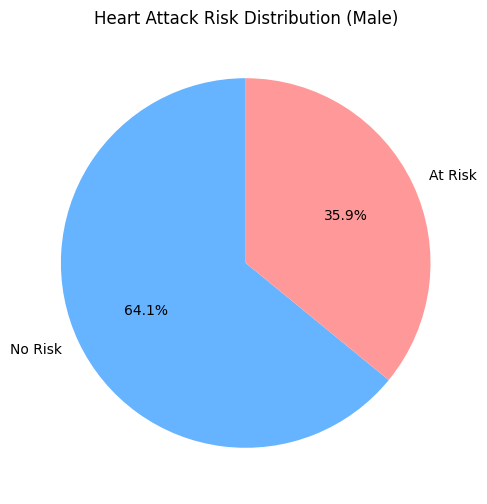

In [12]:
# Pie Chart for Male
plt.figure(figsize=(6, 6))
plt.pie(male_percentages, labels=['No Risk', 'At Risk'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Heart Attack Risk Distribution (Male)')
plt.show()

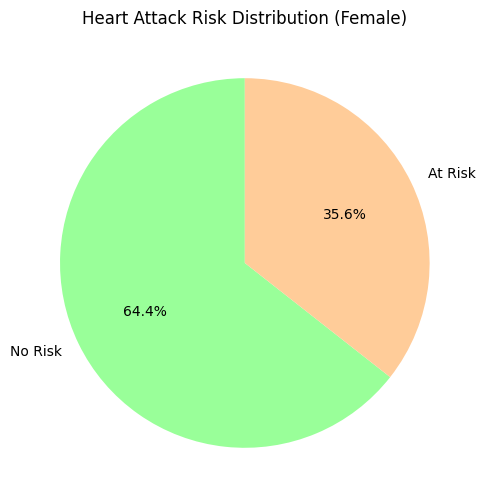

In [13]:
# Pie Chart for Female
plt.figure(figsize=(6, 6))
plt.pie(female_percentages, labels=['No Risk', 'At Risk'], autopct='%1.1f%%', startangle=90, colors=['#99ff99', '#ffcc99'])
plt.title('Heart Attack Risk Distribution (Female)')
plt.show()

###Heart Attack Risk By Age

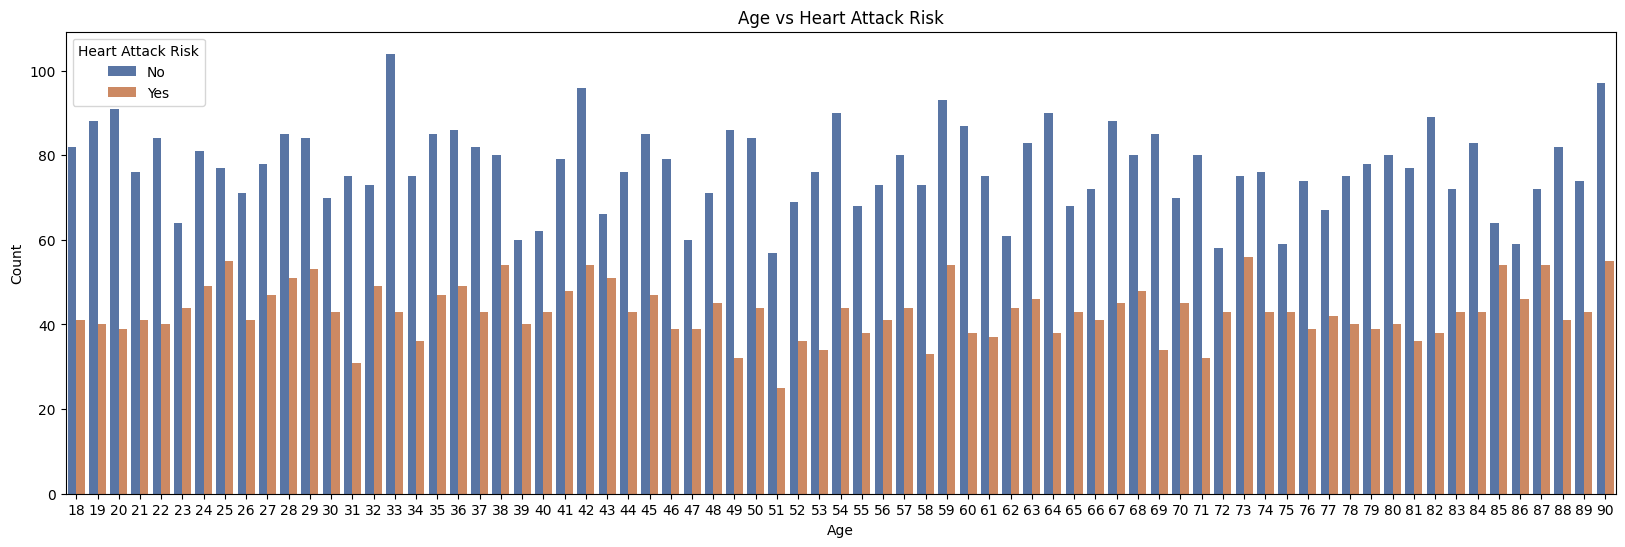

In [15]:
# Bar Plot for Age vs Heart Attack Risk
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Age', hue='Heart Attack Risk', palette='deep')
plt.title('Age vs Heart Attack Risk')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

###Highest/Lowest Risk of Heart Attack on Specific Age

In [19]:
risk_by_age = df.groupby(['Age', 'Heart Attack Risk']).size().unstack(fill_value=0)
age_groups = risk_by_age.index
# print(risk_by_age)

Heart Attack Risk   0   1
Age                      
18                 82  41
19                 88  40
20                 91  39
21                 76  41
22                 84  40
..                 ..  ..
86                 59  46
87                 72  54
88                 82  41
89                 74  43
90                 97  55

[73 rows x 2 columns]


<ipython-input-23-ecb1c6dd5b83>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_risk_percentages.index, y=age_risk_percentages[1], palette='coolwarm')


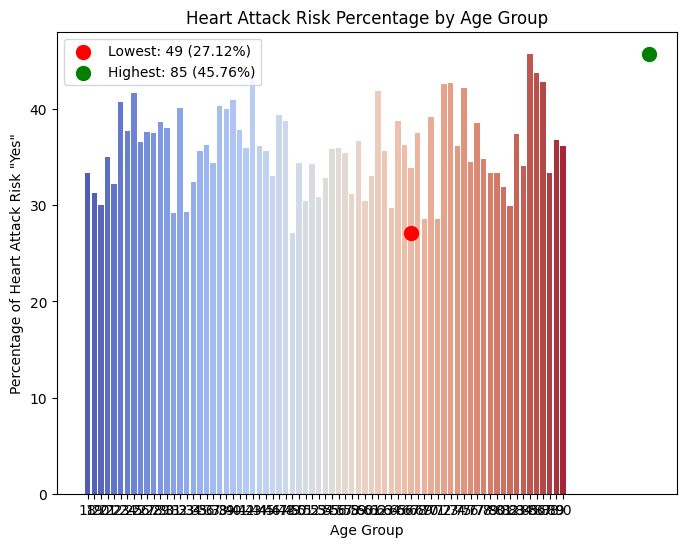

Age group with the lowest heart attack risk ('Yes'): 49 (27.12%)
Age group with the highest heart attack risk ('Yes'): 85 (45.76%)


In [23]:
# Calculate percentages of 'Yes' for each age group
age_risk_percentages = risk_by_age.div(risk_by_age.sum(axis=1), axis=0) * 100

# Find the age groups with the lowest and highest percentage of "Yes"
lowest_risk_age = age_risk_percentages[1].idxmin()
highest_risk_age = age_risk_percentages[1].idxmax()

# Get the percentage for the lowest and highest risk age groups
lowest_risk_percentage = age_risk_percentages.loc[lowest_risk_age, 1]
highest_risk_percentage = age_risk_percentages.loc[highest_risk_age, 1]

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=age_risk_percentages.index, y=age_risk_percentages[1], palette='coolwarm')

# Highlight the lowest and highest
plt.scatter(lowest_risk_age, lowest_risk_percentage, color='red', s=100, label=f"Lowest: {lowest_risk_age} ({lowest_risk_percentage:.2f}%)")
plt.scatter(highest_risk_age, highest_risk_percentage, color='green', s=100, label=f"Highest: {highest_risk_age} ({highest_risk_percentage:.2f}%)")

# Labels and title
plt.title('Heart Attack Risk Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Heart Attack Risk "Yes"')
plt.legend()
plt.show()

# Output the results
print(f"Age group with the lowest heart attack risk ('Yes'): {lowest_risk_age} ({lowest_risk_percentage:.2f}%)")
print(f"Age group with the highest heart attack risk ('Yes'): {highest_risk_age} ({highest_risk_percentage:.2f}%)")

###Heart Attack Risk Case by Country

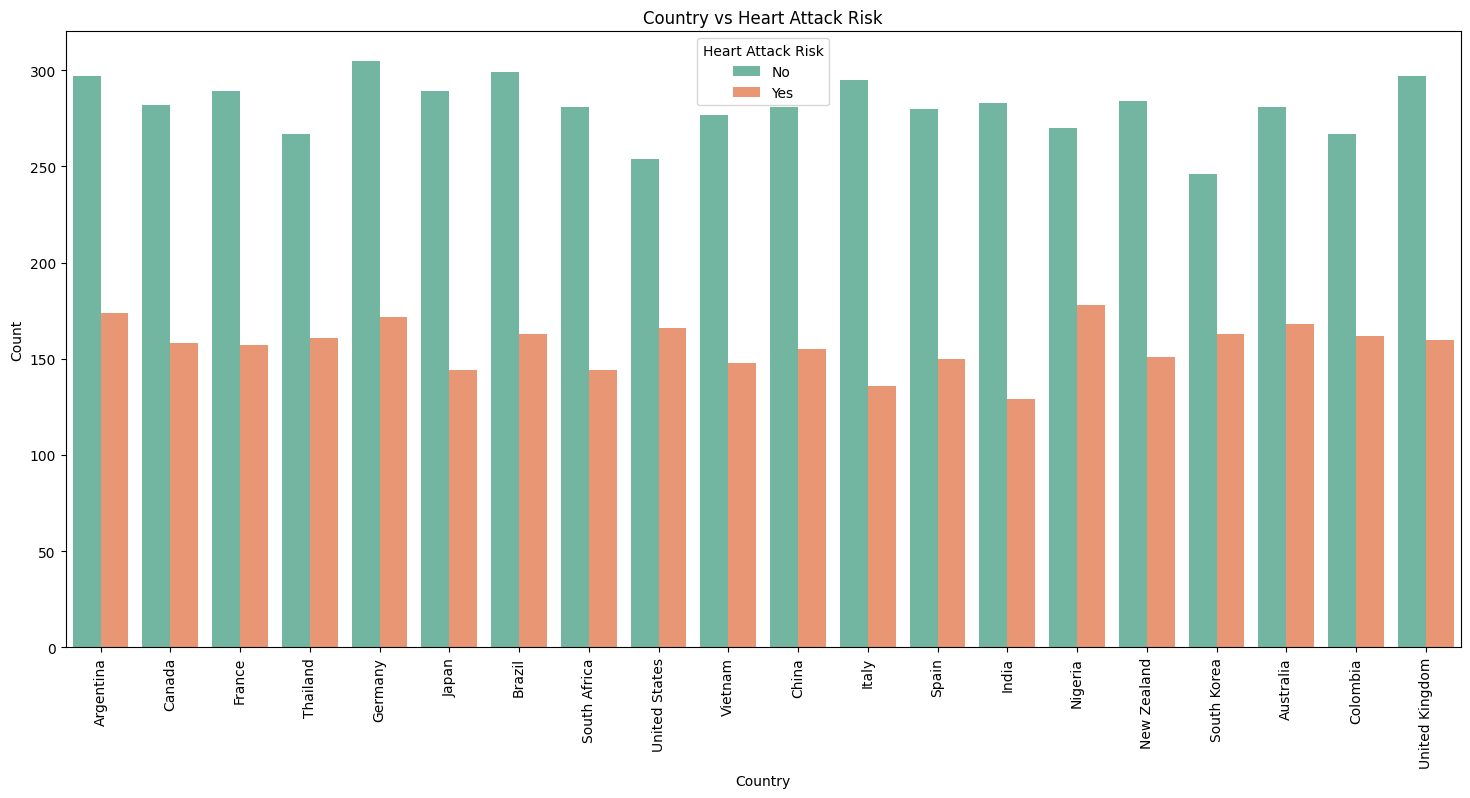

In [24]:
# Plotting Country vs Heart Attack Risk
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Country', hue='Heart Attack Risk', palette='Set2')

# Labels and title
plt.title('Country vs Heart Attack Risk')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate country labels to fit them
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

###Heart Risk Attack by Continent

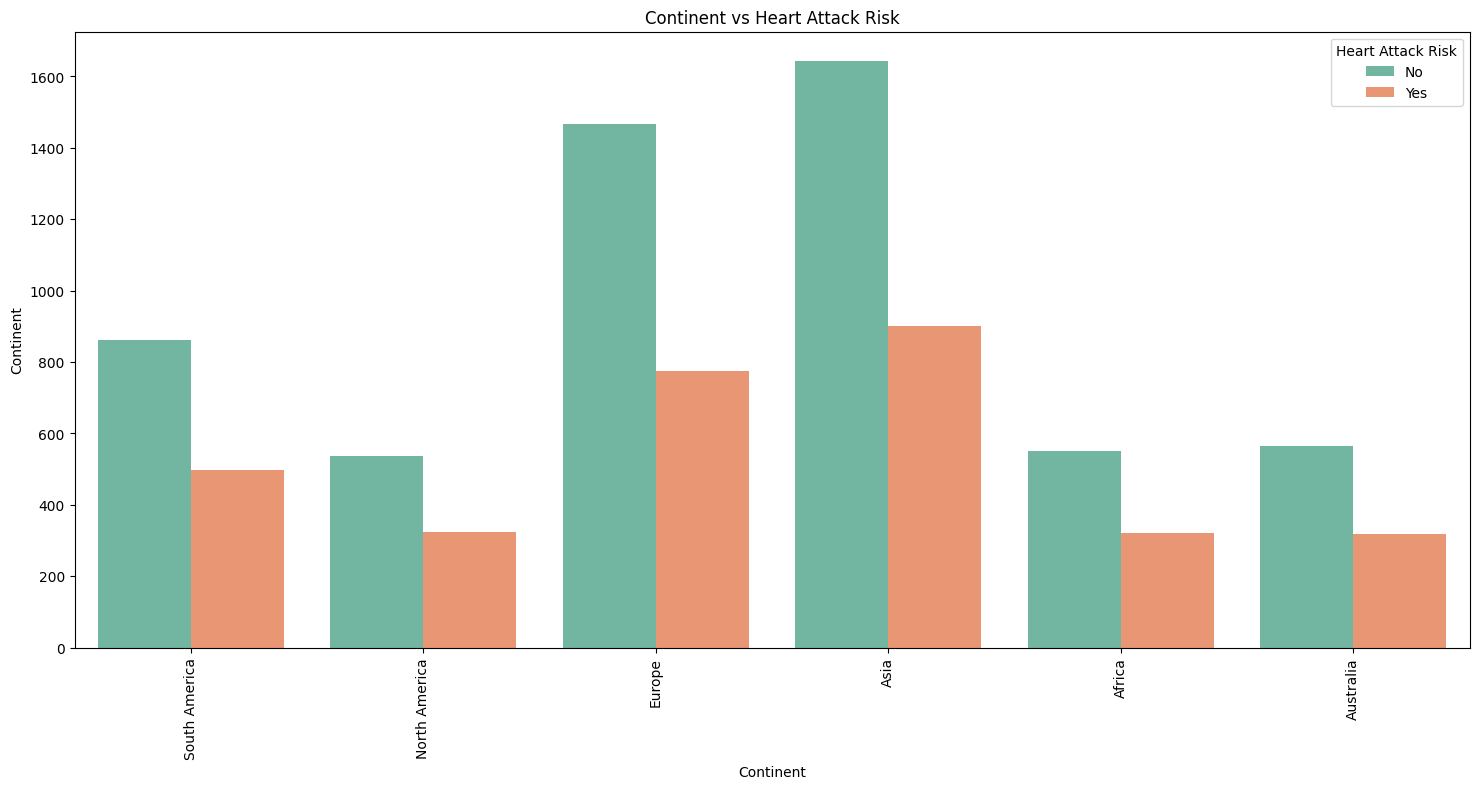

In [25]:
# Plotting Continent vs Heart Attack Risk
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Continent', hue='Heart Attack Risk', palette='Set2')

# Labels and title
plt.title('Continent vs Heart Attack Risk')
plt.xlabel('Continent')
plt.ylabel('Continent')
plt.xticks(rotation=90)  # Rotate country labels to fit them
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

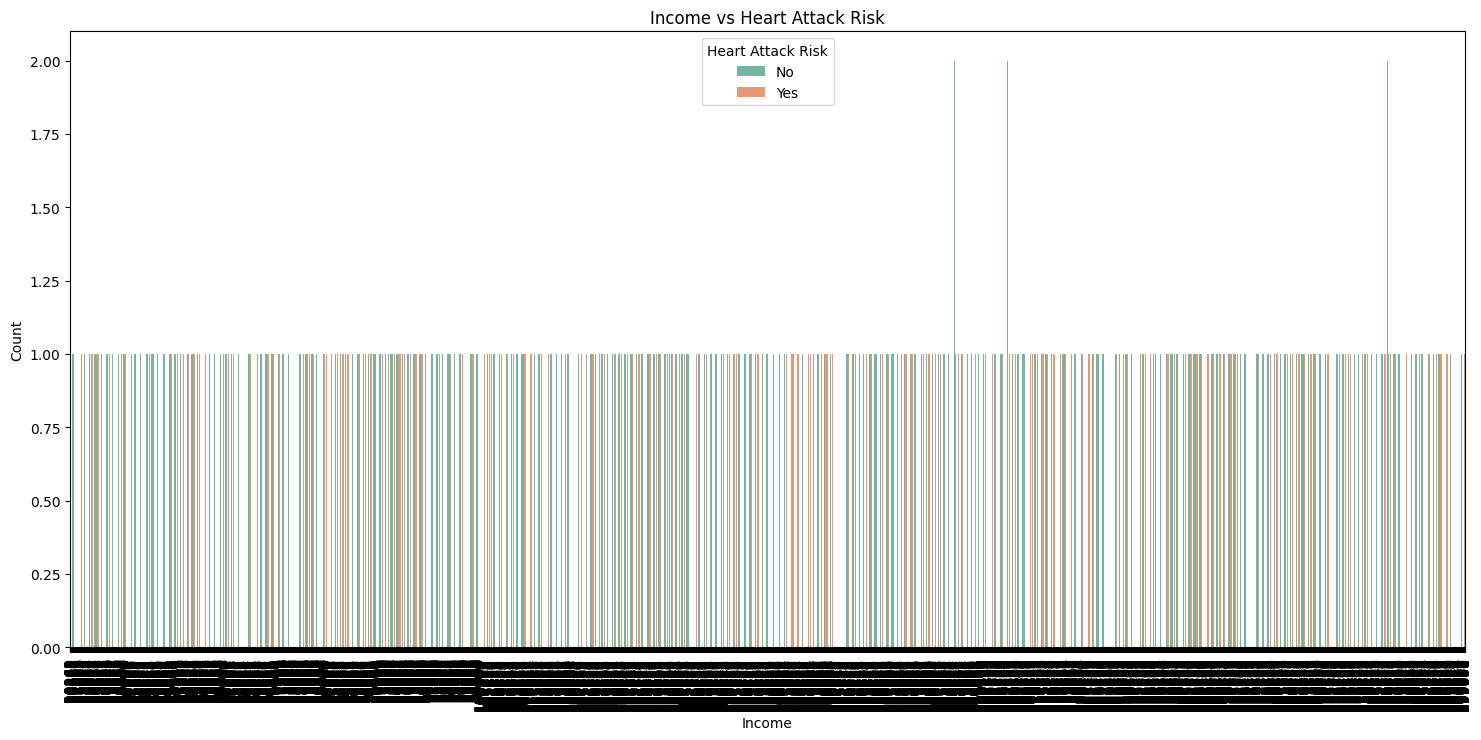

In [27]:
# Plotting Income vs Heart Attack Risk
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Income', hue='Heart Attack Risk', palette='Set2')

# Labels and title
plt.title('Income vs Heart Attack Risk')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate Income labels to fit them
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

###Correlation Heatmap

In [26]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(18, 18))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

ValueError: could not convert string to float: 'BMW7812'